### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-22,434756,4431650,628503,574527,253155,131958,128751,173003,113472,91987,83136,124216,102038,4848,197879
2021-08-23,435110,4441453,629411,574848,253526,132000,128795,173768,113857,92028,83337,124315,102648,4848,197879
2021-08-24,435758,4452511,630816,575742,254466,132174,128855,174542,114026,92067,83527,124388,103357,4848,197944
2021-08-25,436365,4463734,632272,576645,255452,132323,128914,175328,114144,92090,83690,124474,104022,4848,197944
2021-08-26,436861,4474496,633564,577565,256287,132465,128957,176127,114269,92108,83861,124567,104716,4848,198031


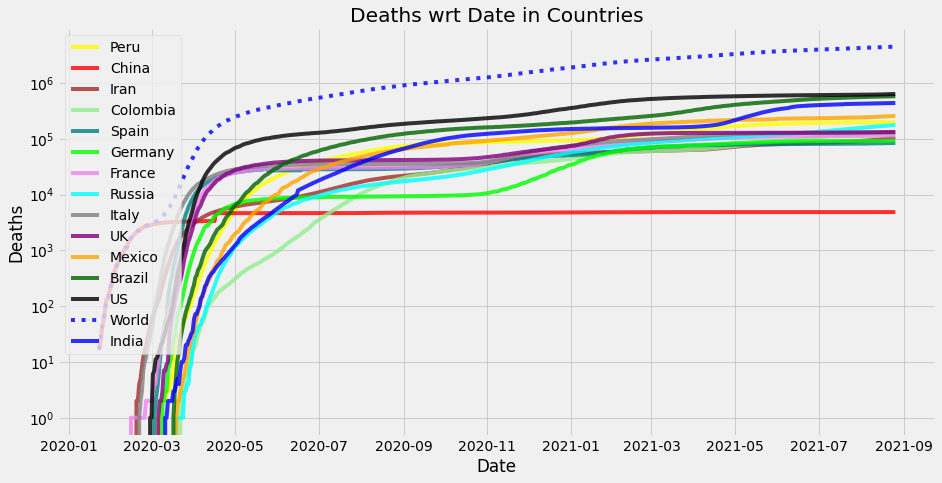

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-22,25072,443383,33497,14404,7658,32034,5922,19977,17300,5946,0,2640,36419,26,918
2021-08-23,25467,697330,229831,13103,6543,31856,4166,18875,7911,5592,23899,2698,38657,40,0
2021-08-24,37593,664817,135245,30872,18262,30762,6078,18260,25914,16654,10072,2467,40623,27,1538
2021-08-25,46164,707326,148143,30671,21250,35618,7539,18972,23706,13275,10781,2448,39983,31,0
2021-08-26,44658,711549,161331,31024,20633,38117,7215,19094,19893,11688,7115,1935,36758,35,0


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-22,37083,612377,111661,32762,16348,30462,5724,21320,21327,4491,14082,6639,33166,61,1423
2021-08-23,36309,618041,119539,31451,15694,30555,5620,21157,20433,4564,14736,6377,33532,59,1328
2021-08-24,36394,621159,120586,31412,15865,30569,5651,20963,20798,5370,14425,6116,34004,57,1342
2021-08-25,37046,626904,122423,31363,16224,30905,5776,20831,20992,5897,14182,5871,34403,55,1252
2021-08-26,37553,632547,125017,31340,16518,31386,5872,20715,20919,6283,13711,5609,34560,54,1169


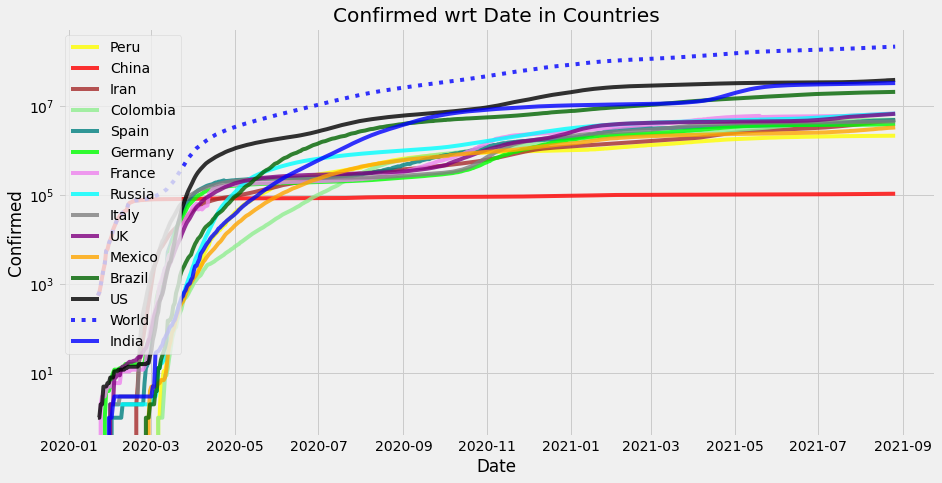

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-22,389,7508,164,318,228,49,23,746,0,4,0,95,684,0,61
2021-08-23,354,9803,908,321,371,42,44,765,385,41,201,99,610,0,0
2021-08-24,648,11058,1405,894,940,174,60,774,169,39,190,73,709,0,65
2021-08-25,607,11223,1456,903,986,149,59,786,118,23,163,86,665,0,0
2021-08-26,496,10762,1292,920,835,142,43,799,125,18,171,93,694,0,87


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-22,466.05,9585.92,802.54,794.46,602.66,92.22,37.04,773.47,65.60,13.33,69.86,138.37,552.80,-0.0,68.54
2021-08-23,452.04,9613.05,815.72,735.28,573.70,85.94,37.91,772.41,105.52,16.79,86.25,133.45,559.95,-0.0,59.98
2021-08-24,476.54,9793.67,889.38,755.12,619.49,96.95,40.67,772.61,113.46,19.56,99.22,125.89,578.58,-0.0,60.60
2021-08-25,492.84,9972.34,960.21,773.60,665.30,103.46,42.96,774.28,114.02,19.99,107.19,120.91,589.38,-0.0,53.03
2021-08-26,493.24,10071.04,1001.68,791.90,686.51,108.28,42.97,777.37,115.40,19.74,115.17,117.42,602.46,-0.0,57.27


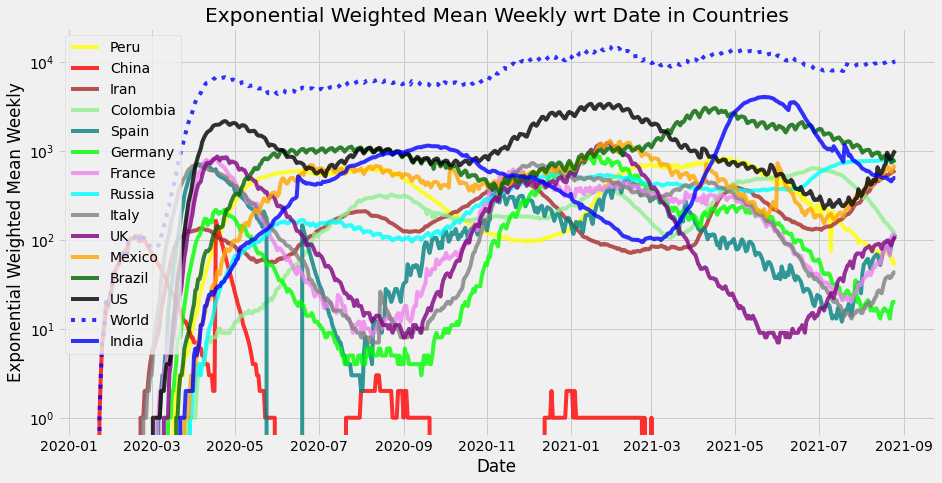

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

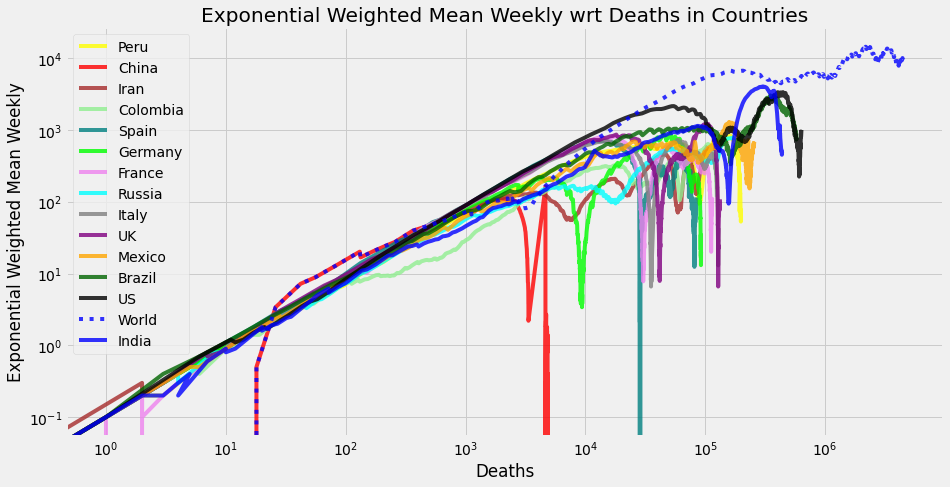

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

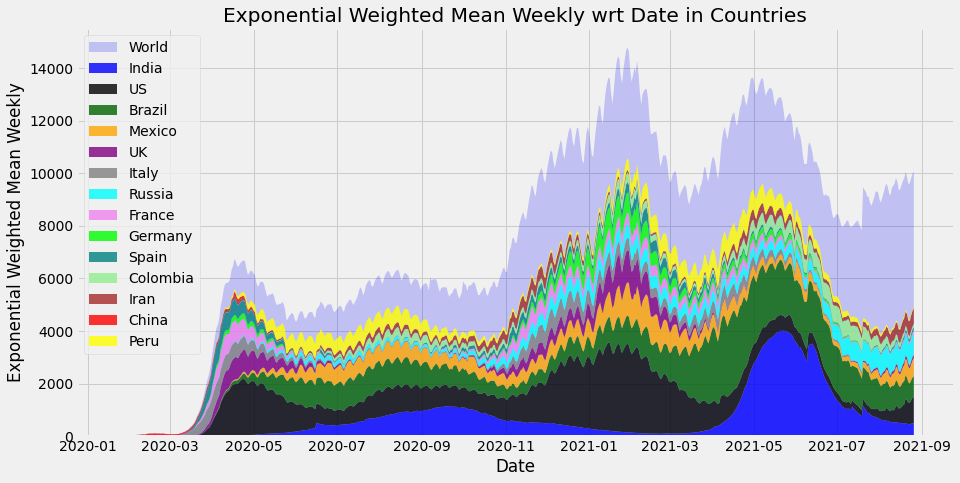

In [20]:
stackplotter(AVG, name)

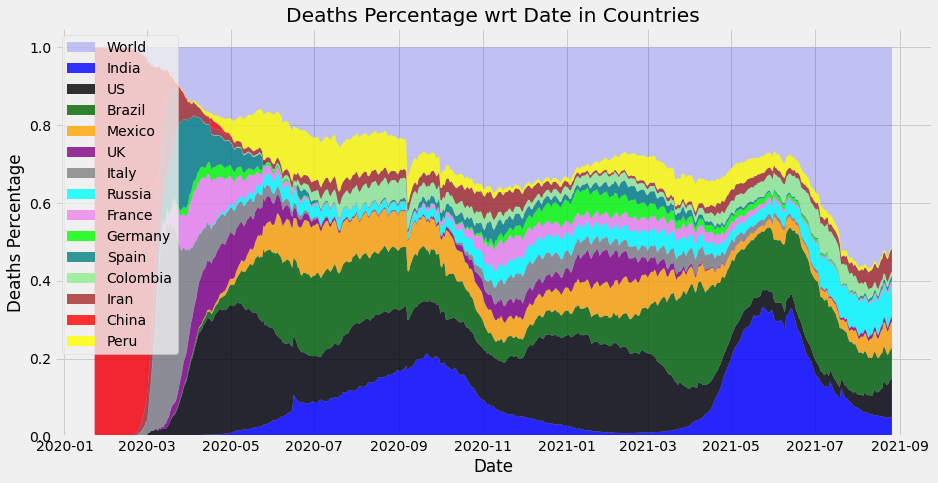

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

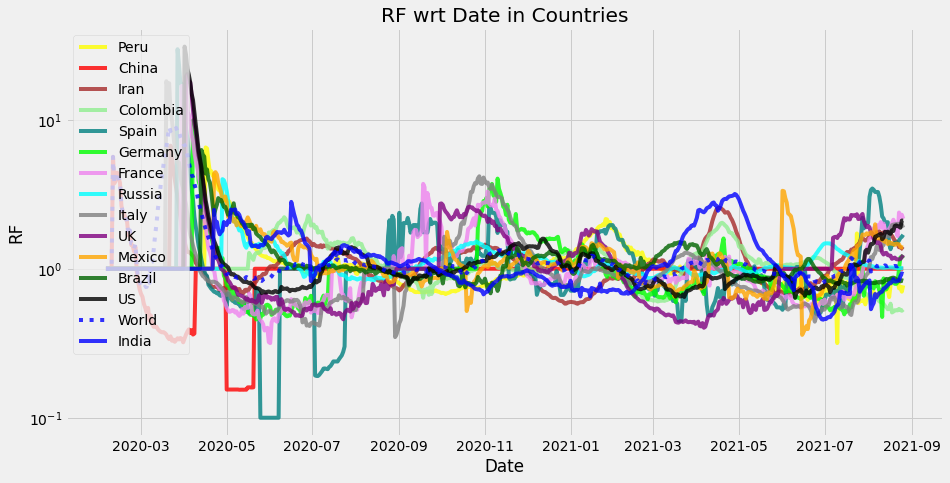

In [23]:
plotter(Reproductivity, 'RF')

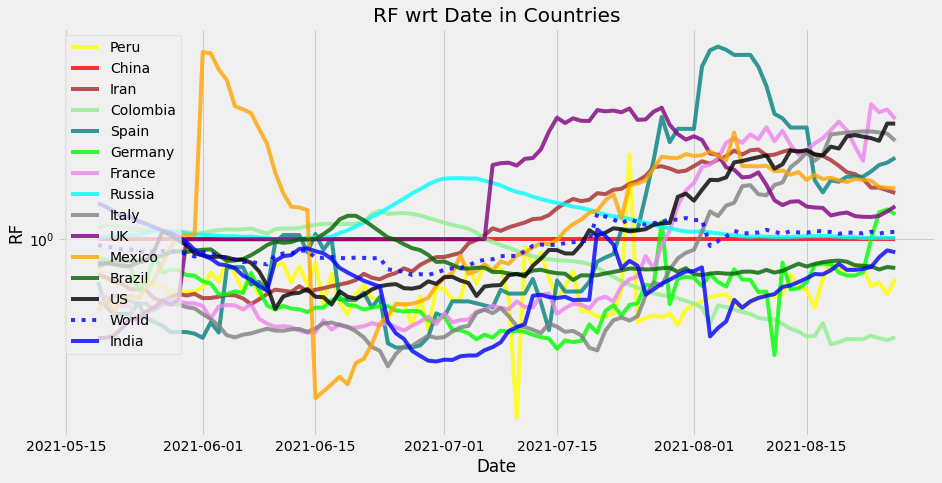

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

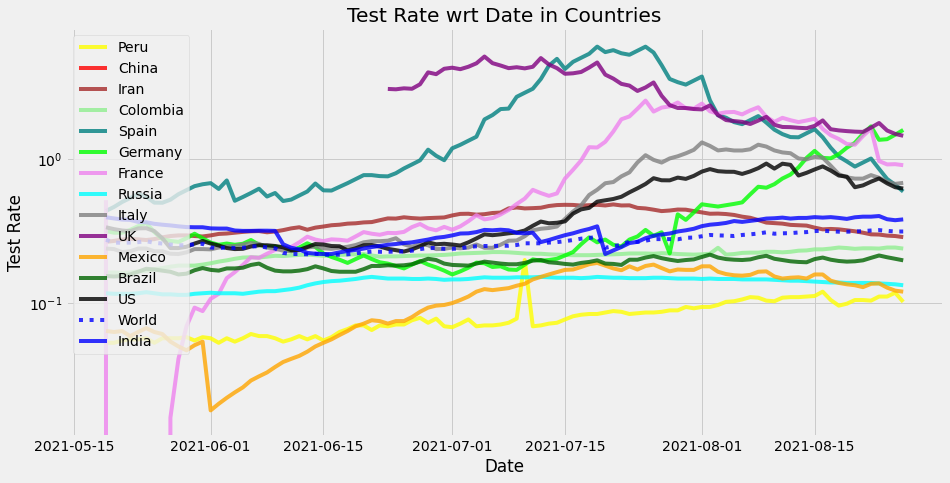

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

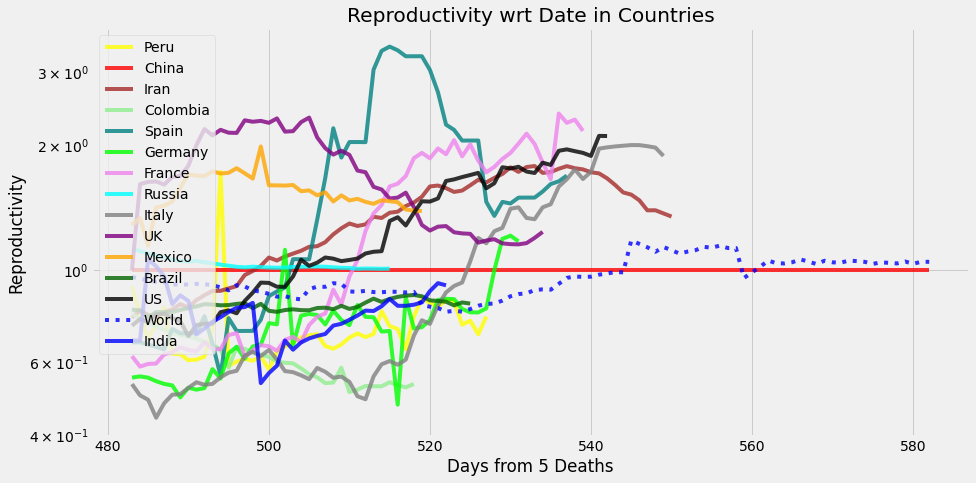

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

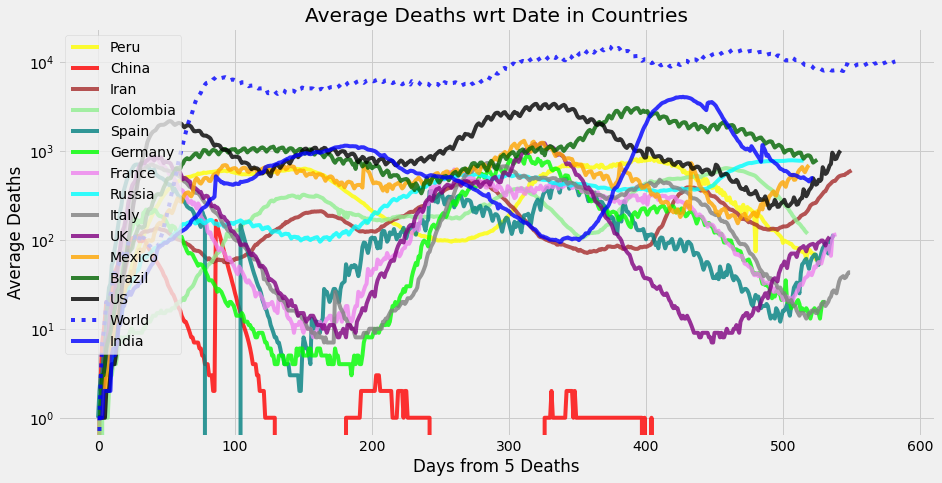

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

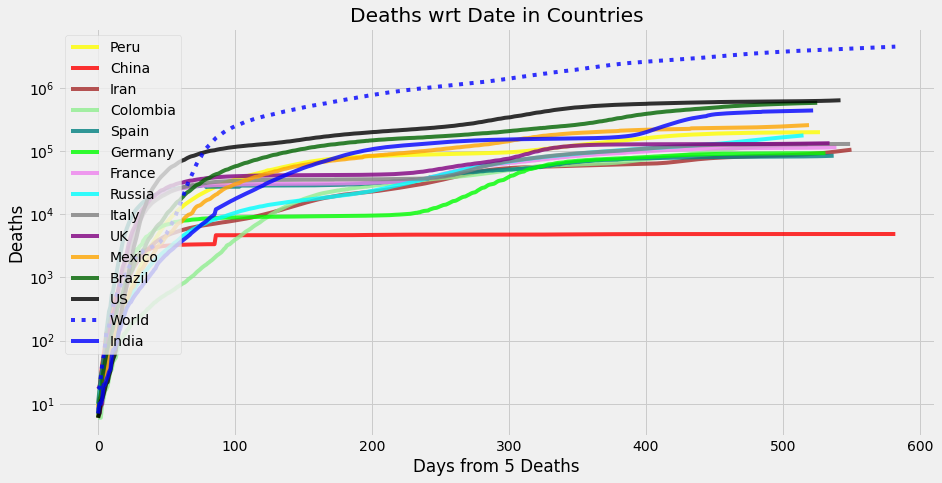

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4474496,10762,10105.57,10071.04,1.0480,214624457,0.314,632547,894.90
US,633564,1292,1193.86,1001.68,2.1051,38384360,0.624,125017,126.71
Brazil,577565,920,703.43,791.90,0.8314,20676561,0.198,31340,115.51
India,436861,496,467.43,493.24,0.9198,32603188,0.381,37553,87.37
Mexico,256287,835,711.71,686.51,1.3890,3291761,0.120,16518,51.26
Peru,198031,87,45.00,57.27,0.7736,2143691,0.102,1169,39.61
Russia,176127,799,773.00,777.37,1.0091,6728699,0.133,20715,35.23
UK,132465,142,110.57,108.28,1.2371,6659916,1.449,31386,26.49
Indonesia,130182,889,1078.43,1186.57,0.7386,4043736,0.102,24152,26.04


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4474496,10762,10105.57,10071.04,1.0480,214624457,0.314,632547,894.90
US,633564,1292,1193.86,1001.68,2.1051,38384360,0.624,125017,126.71
Indonesia,130182,889,1078.43,1186.57,0.7386,4043736,0.102,24152,26.04
Russia,176127,799,773.00,777.37,1.0091,6728699,0.133,20715,35.23
Mexico,256287,835,711.71,686.51,1.3890,3291761,0.120,16518,51.26
Brazil,577565,920,703.43,791.90,0.8314,20676561,0.198,31340,115.51
Iran,104716,694,637.29,602.46,1.3470,4833135,0.287,34560,20.94
India,436861,496,467.43,493.24,0.9198,32603188,0.381,37553,87.37
Vietnam,9667,318,359.57,339.68,1.2768,392938,0.136,9230,1.93


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4474496


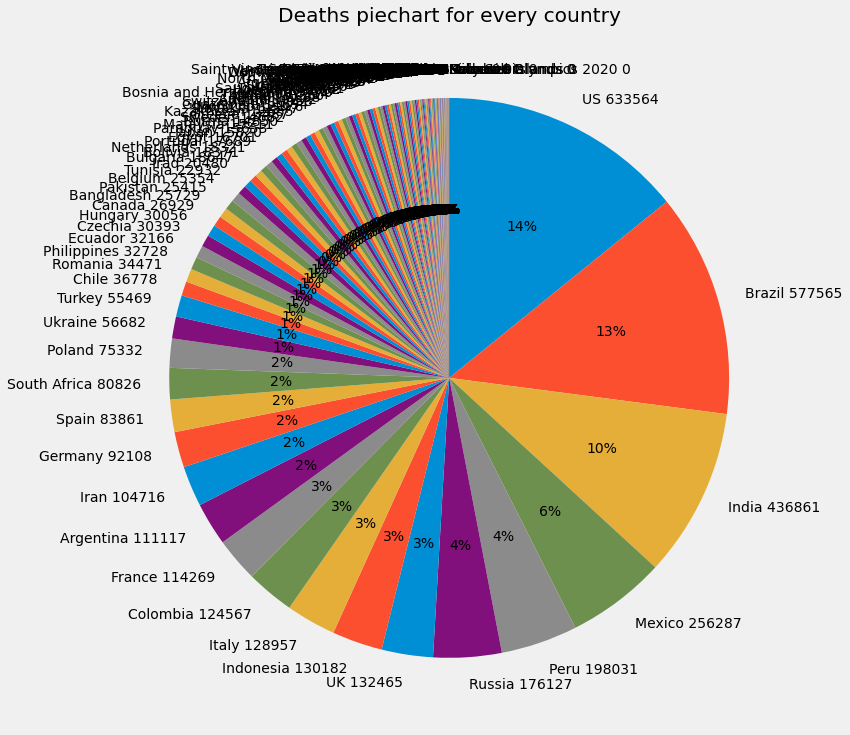

In [35]:
piechart('Deaths')

World total:  10105


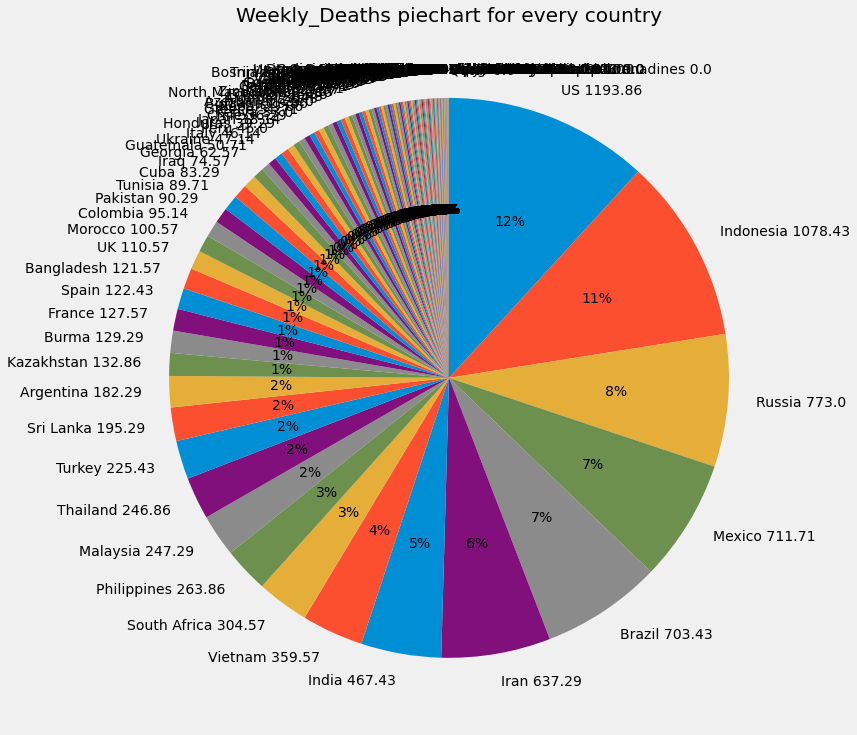

In [36]:
piechart('Weekly_Deaths')

World total:  10762


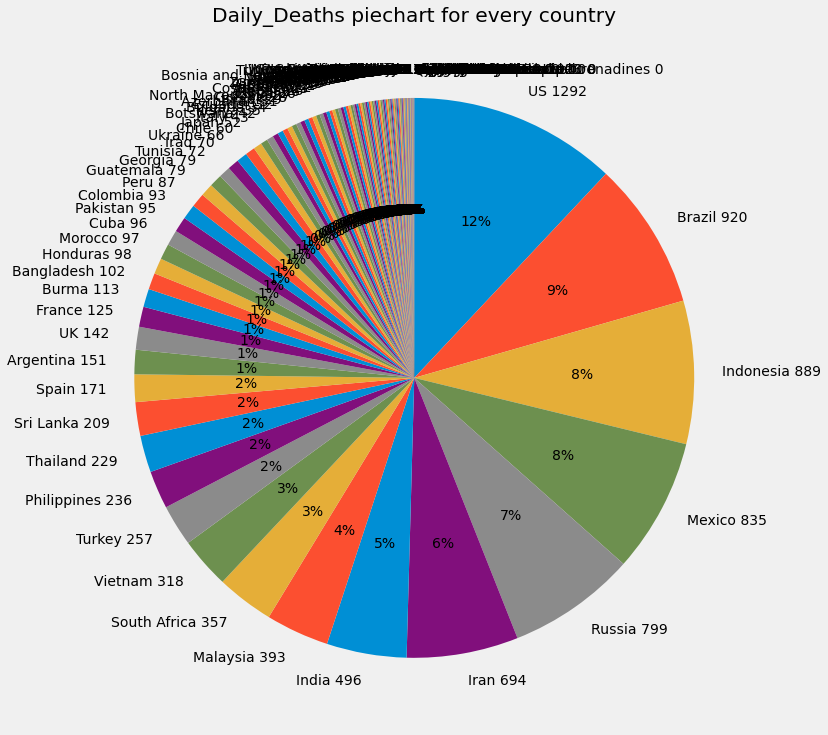

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-08-27


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

894899200.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 432f8ef] `date` update
 1 file changed, 630 insertions(+), 27 deletions(-)


To https://github.com/Arrowheadahp/COVID-19.git
   56a0bdb..432f8ef  master -> master
